In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/home/neosoft/Documents/news/train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
# Get the Independant features

x = df.drop('label',axis=1)

In [6]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [7]:
# Get the Dependant feature
y = df['label']

In [8]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [9]:
df.shape   # Total no. of records

(20800, 5)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
df.isna().sum()  # No. of na values

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [12]:
df = df.dropna() # dropping NAN values

In [13]:
messages = df.copy()

In [14]:
messages.reset_index(inplace= True) # to get indexes in order after dropping NAN values

In [15]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [16]:
## TEXT PREPROCESSING
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [18]:
# Applying CountVectorizer
# Creating the Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000,ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

In [19]:
x.shape

(18285, 5000)

In [20]:
y = messages['label']

In [21]:
# Divide dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [22]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [23]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [24]:
count_df = pd.DataFrame(x_train, columns= cv.get_feature_names())

In [25]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
## Custom way of Plotting confusion matrix
import matplotlib.pyplot as plt

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'CONFUSION MATRIX',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("NORMALIZED CONFUSION MATRIX")
    else:
        print("CONFUSION MATRIX, WITHOUT NORMALIZATION")
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j ,i , cm[i,j],
                horizontalalignment = 'center',
                color = 'white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel("TRUE LABEL")
    plt.xlabel("PREDICTED LABEL")
    

## MULTINOMIAL NAIVE BAYES

In [28]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [29]:
from sklearn import metrics
import numpy as np
import itertools

ACCURACY :  0.902
CONFUSION MATRIX, WITHOUT NORMALIZATION


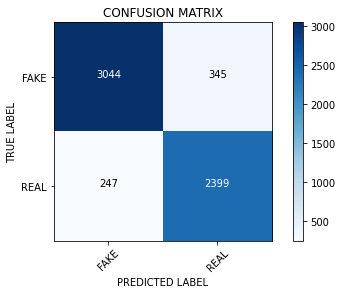

In [30]:
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test,pred)
print("ACCURACY :  %0.3f" % score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [31]:
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test,pred)
print("SCORE :", score)

SCORE : 0.9019055509527755


In [32]:
y_train.shape

(12250,)

## Passive Aggressive Classifier Algorithm

In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_cf = PassiveAggressiveClassifier(n_iter_no_change= 50)

ACCURACY : 0.920
CONFUSION MATRIX, WITHOUT NORMALIZATION


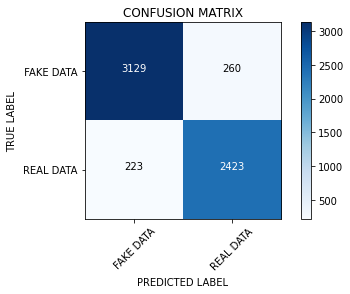

In [34]:
linear_cf.fit(x_train,y_train)
pred = linear_cf.predict(x_test)
score = metrics.accuracy_score(y_test,pred)
print("ACCURACY : %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=[" FAKE DATA", "REAL DATA"])

## Multinomial NB with Hyperparameter

In [35]:
classifier = MultinomialNB(alpha = 0.1)

In [36]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB( alpha = alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred = sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier = sub_classifier
    print("ALPHA: {}, SCORE: {}".format(alpha,score))

ALPHA: 0.0, SCORE: 0.8903065451532726
ALPHA: 0.1, SCORE: 0.9020712510356255
ALPHA: 0.2, SCORE: 0.9025683512841757
ALPHA: 0.30000000000000004, SCORE: 0.9024026512013256
ALPHA: 0.4, SCORE: 0.9017398508699255
ALPHA: 0.5, SCORE: 0.9015741507870754
ALPHA: 0.6000000000000001, SCORE: 0.9022369511184756
ALPHA: 0.7000000000000001, SCORE: 0.9025683512841757
ALPHA: 0.8, SCORE: 0.9015741507870754
ALPHA: 0.9, SCORE: 0.9017398508699255


In [37]:
# Get feature names
feature_names = cv.get_feature_names()

In [38]:
classifier.coef_[0] # getting coefficient value --- most negative value is most fakest value

array([ -9.10038883,  -8.62276128,  -9.10038883, ..., -10.79498456,
        -8.91467169,  -9.32864749])

In [39]:
# Most Real:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.000149156604985, 'trump'),
 (-4.287872694443541, 'hillari'),
 (-4.396389621061519, 'clinton'),
 (-4.899969726208735, 'elect'),
 (-5.176598600897756, 'new'),
 (-5.234730366348767, 'comment'),
 (-5.273968180973631, 'video'),
 (-5.3868167681180115, 'war'),
 (-5.396821854078974, 'us'),
 (-5.412019714988405, 'hillari clinton'),
 (-5.417137433425386, 'fbi'),
 (-5.48068448454208, 'vote'),
 (-5.566255475855405, 'email'),
 (-5.578238842742501, 'world'),
 (-5.634015380199913, 'obama'),
 (-5.734501455772904, 'donald'),
 (-5.763095255139644, 'donald trump'),
 (-5.785090276725191, 'russia'),
 (-5.846224665218559, 'day'),
 (-5.862110622807369, 'america')]

In [40]:
# Most Fake:
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.794984555596727, 'abe'),
 (-10.794984555596727, 'abroad'),
 (-10.794984555596727, 'abus new'),
 (-10.794984555596727, 'abus new york'),
 (-10.794984555596727, 'act new'),
 (-10.794984555596727, 'act new york'),
 (-10.794984555596727, 'advic'),
 (-10.794984555596727, 'advis new'),
 (-10.794984555596727, 'advis new york'),
 (-10.794984555596727, 'age new'),
 (-10.794984555596727, 'age new york'),
 (-10.794984555596727, 'agenda breitbart'),
 (-10.794984555596727, 'ail'),
 (-10.794984555596727, 'aleppo new'),
 (-10.794984555596727, 'aleppo new york'),
 (-10.794984555596727, 'ali'),
 (-10.794984555596727, 'america breitbart'),
 (-10.794984555596727, 'america new york'),
 (-10.794984555596727, 'american breitbart'),
 (-10.794984555596727, 'american new')]